# Textes

## Pré traitement

In [36]:
import pandas as pd

# Charger le fichier CSV
file_path = 'DB/flipkart.csv'
data = pd.read_csv(file_path)

nombre_de_lignes = data.shape[0]
print(f"Le dataframe contient {nombre_de_lignes} ligne(s).")

# Afficher les 5 premières lignes
data.head()


Le dataframe contient 1050 ligne(s).


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


### Extraction de la catégorie

In [37]:
import pandas as pd
import re

# Extraire la première catégorie, si elle est présente
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)

# Afficher les 5 premières lignes pour vérifier le résultat
print(data[['product_category_tree', 'main_category']].head())


                               product_category_tree    main_category
0  ["Home Furnishing >> Curtains & Accessories >>...  Home Furnishing
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing


### Concaténation

In [38]:
import pandas as pd
import re

# Supposons que 'data' est déjà chargé en tant que DataFrame
# Extraire la première catégorie, si elle est présente
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)

# Concaténer 'product_name' et 'description' dans une nouvelle colonne 'product_info'
data['product_info'] = data['product_name'].fillna('') + ' ' + data['description'].fillna('')

# Afficher les 5 premières lignes pour vérifier les résultats
print(data[['product_category_tree', 'main_category']].head())
print(data['product_info'].head())


                               product_category_tree    main_category
0  ["Home Furnishing >> Curtains & Accessories >>...  Home Furnishing
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing
0    Elegance Polyester Multicolor Abstract Eyelet ...
1    Sathiyas Cotton Bath Towel Specifications of S...
2    Eurospa Cotton Terry Face Towel Set Key Featur...
3    SANTOSH ROYAL FASHION Cotton Printed King size...
4    Jaipur Print Cotton Floral King sized Double B...
Name: product_info, dtype: object


### Pré-traitement

In [39]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Télécharger les stopwords et lemmatiser
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialiser les stopwords en anglais et le lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Fonction de pré-traitement
def preprocess_text(text):
    # Mettre en minuscules
    text = text.lower()
    
    # Supprimer la ponctuation et conserver seulement les caractères alphanumériques
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Supprimer les stopwords et appliquer la lemmatisation
    text = ' '.join(
        lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words
    )
    
    return text

# Appliquer le pré-traitement à la colonne 'product_info'
data['product_info_clean'] = data['product_info'].apply(preprocess_text)

# Afficher les 5 premières lignes pour vérifier le résultat
print(data[['product_info', 'product_info_clean']].head())


                                        product_info  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1  Sathiyas Cotton Bath Towel Specifications of S...   
2  Eurospa Cotton Terry Face Towel Set Key Featur...   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                  product_info_clean  
0  elegance polyester multicolor abstract eyelet ...  
1  sathiyas cotton bath towel specification sathi...  
2  eurospa cotton terry face towel set key featur...  
3  santosh royal fashion cotton printed king size...  
4  jaipur print cotton floral king sized double b...  


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kevinroualec/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kevinroualec/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kevinroualec/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### N mots +/- Fréquents

In [40]:
from collections import Counter
from tabulate import tabulate

# Concaténer tous les mots de la colonne 'product_info_clean' en un seul texte
all_words = ' '.join(data['product_info_clean'].dropna()).split()

# Compter la fréquence de chaque mot
word_counts = Counter(all_words)

# Obtenir les 10 mots les plus fréquents
most_common_words = word_counts.most_common(50)

# Obtenir les 10 mots les moins fréquents
least_common_words = word_counts.most_common()[-50:]

# Afficher les mots les plus fréquents
print("Les mots les plus fréquents :")
print(tabulate(most_common_words, headers=["Mot", "Fréquence"], tablefmt="pipe"))

# Afficher les mots les moins fréquents
print("\nLes mots les moins fréquents :")
print(tabulate(least_common_words, headers=["Mot", "Fréquence"], tablefmt="pipe"))


Les mots les plus fréquents :
| Mot         |   Fréquence |
|:------------|------------:|
| r           |         918 |
| product     |         863 |
| cm          |         677 |
| free        |         616 |
| buy         |         582 |
| replacement |         568 |
| delivery    |         567 |
| genuine     |         564 |
| shipping    |         564 |
| cash        |         564 |
| price       |         559 |
| day         |         555 |
| mug         |         525 |
| watch       |         506 |
| flipkartcom |         472 |
| guarantee   |         471 |
| set         |         437 |
| baby        |         414 |
| feature     |         403 |
| online      |         396 |
| analog      |         382 |
| color       |         370 |
| cotton      |         341 |
| pack        |         331 |
| type        |         324 |
| girl        |         313 |
| showpiece   |         312 |
| material    |         307 |
| box         |         305 |
| ceramic     |         295 |
| design  

## Bag of words

#### Encodage

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Initialiser le vecteur de comptage des mots (Bag of Words)
vectorizer = CountVectorizer()

# Transformer la colonne 'product_info_clean' en une matrice de Bag of Words
bow_matrix = vectorizer.fit_transform(data['product_info_clean'].dropna())

# Convertir la matrice en DataFrame pour une meilleure lisibilité
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Afficher les 5 premières lignes
print(bow_df.head())


   aa  aaa  aapno  aari  aarika  ability  abklgrngrngrn  abklplplpnk  \
0   0    0      0     0       0        0              0            0   
1   0    0      0     0       0        0              0            0   
2   0    0      0     0       0        0              0            0   
3   0    0      0     0       0        0              0            0   
4   0    0      0     0       0        0              0            0   

   abklplpnkpnk  able  ...  zinc  zingalalaa  zip  zipexterior  zipper  \
0             0     0  ...     0           0    0            0       0   
1             0     0  ...     0           0    0            0       0   
2             0     0  ...     0           0    0            0       0   
3             0     0  ...     0           0    0            0       0   
4             0     0  ...     0           0    0            0       0   

   zippered  zone  zoom  zora  zyxel  
0         0     0     0     0      0  
1         0     0     0     0      0  
2    

#### Visualisation

                               product_category_tree    main_category
0  ["Home Furnishing >> Curtains & Accessories >>...  Home Furnishing
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing
   Dimension 1  Dimension 2 Catégorie Principale
0    22.946352   -17.940342      Home Furnishing
1    10.394277   -15.274183            Baby Care
2     4.768706   -17.602331            Baby Care
3    34.484005     5.876401      Home Furnishing
4    34.157875     6.386759      Home Furnishing


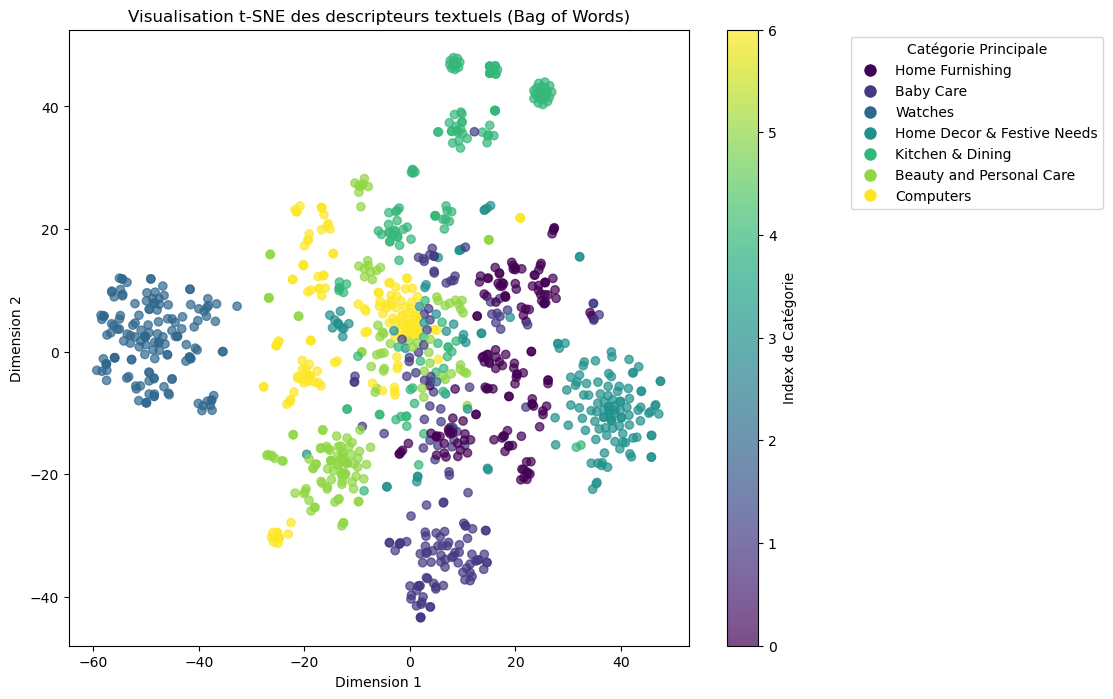

In [42]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

# Supposons que 'data' contient les colonnes 'product_info_clean' et 'product_category_tree'
# Extraire la première catégorie, si elle est présente
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)

# Vérifier que la colonne 'main_category' a été ajoutée correctement
print(data[['product_category_tree', 'main_category']].head())

# Initialiser le vecteur de comptage des mots (Bag of Words)
vectorizer = CountVectorizer()

# Transformer la colonne 'product_info_clean' en une matrice Bag of Words
bow_matrix = vectorizer.fit_transform(data['product_info_clean'].dropna())

# Appliquer t-SNE pour réduire la dimensionnalité
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(bow_matrix.toarray())

# Convertir les résultats t-SNE en DataFrame
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])

# Conserver les index pour aligner avec la catégorie principale
# Récupérer les index des lignes non nulles de 'product_info_clean'
non_null_index = data['product_info_clean'].dropna().index

# Ajouter la colonne 'main_category' à tsne_df en s'assurant que l'index correspond
tsne_df['Catégorie Principale'] = data['main_category'].loc[non_null_index].reset_index(drop=True)

# Vérifier si la colonne 'Catégorie Principale' a été ajoutée avec succès
print(tsne_df.head())

# Visualisation si la colonne 'Catégorie Principale' a été ajoutée avec succès
if 'Catégorie Principale' in tsne_df.columns:
    plt.figure(figsize=(10, 8))
    
    # Créer une palette de couleurs
    unique_categories = tsne_df['Catégorie Principale'].unique()
    category_colors = {category: idx for idx, category in enumerate(unique_categories)}
    
    # Colorer les points en fonction des catégories
    scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                          c=tsne_df['Catégorie Principale'].map(category_colors), 
                          cmap='viridis', alpha=0.7)
    
    # Créer une légende à l'extérieur
    handles = [plt.Line2D([0], [0], marker='o', color='w', 
                           markerfacecolor=scatter.cmap(scatter.norm(category_colors[cat])), 
                           markersize=10) for cat in unique_categories]
    
    plt.legend(handles, unique_categories, title='Catégorie Principale', loc='upper left', bbox_to_anchor=(1.25, 1))
    
    plt.title('Visualisation t-SNE des descripteurs textuels (Bag of Words)')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(scatter, label='Index de Catégorie')
    plt.show()
else:
    print("Impossible d'afficher la visualisation car la colonne 'Catégorie Principale' n'a pas été ajoutée.")


#### Kmeans


Meilleurs hyperparamètres : (7, 'random', 3, 300, 0.0001, 'lloyd') avec un ARI de 0.16


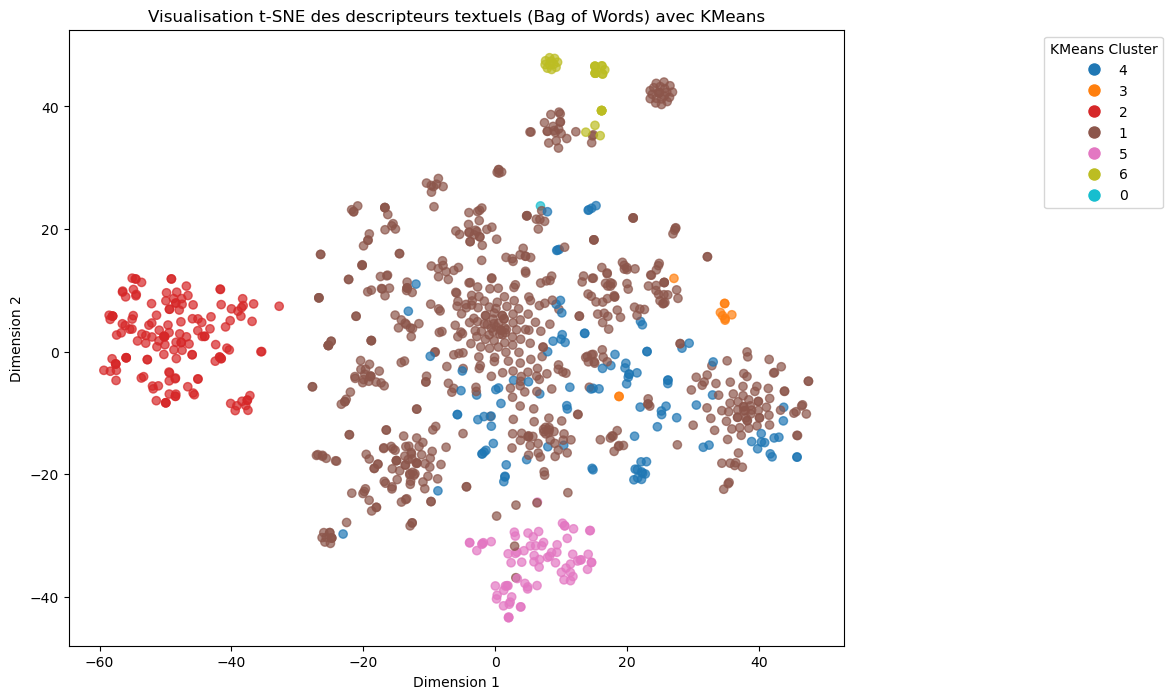

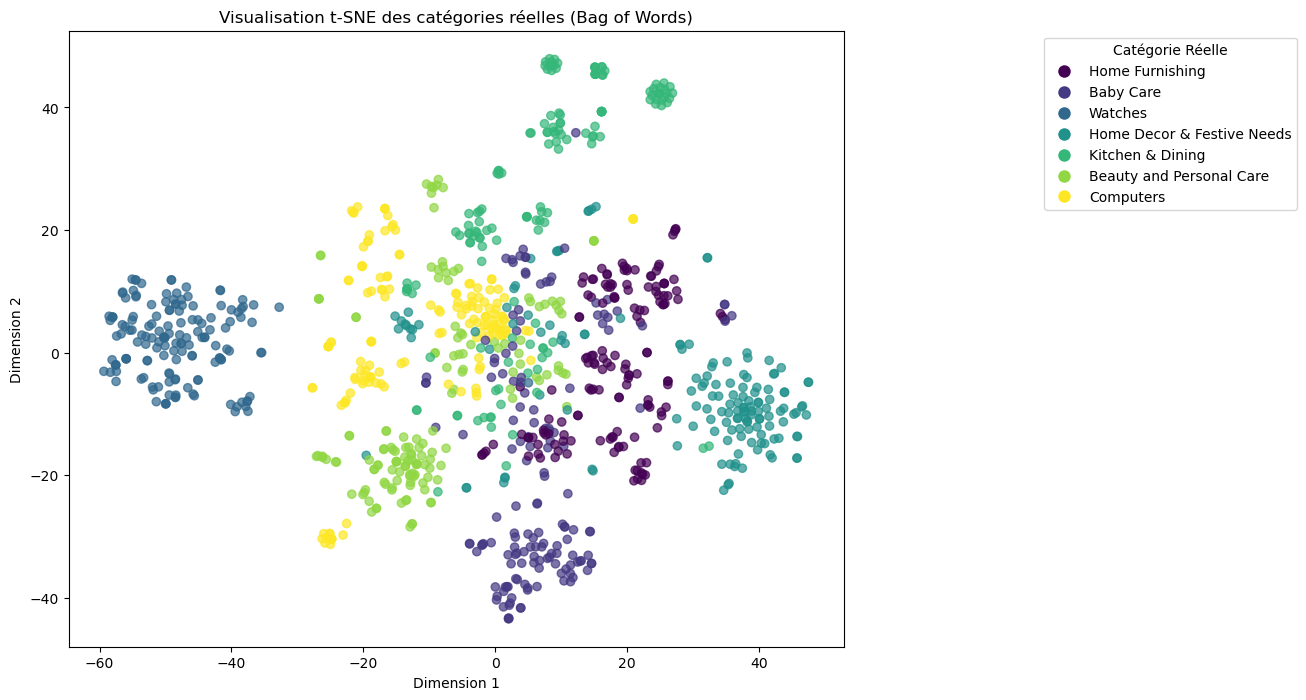

In [43]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Supposons que 'data' contient les colonnes 'product_info_clean' et 'product_category_tree'
# Extraire la première catégorie, si elle est présente
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)

# Initialiser le vecteur de comptage des mots (Bag of Words)
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(data['product_info_clean'].dropna())

# Récupérer les index des lignes non nulles pour aligner les catégories principales
non_null_index = data['product_info_clean'].dropna().index
clustered_df = pd.DataFrame()

# Définir la grille d'hyperparamètres
param_grid_kmeans = {
    'n_clusters': [7],
    'init': ['k-means++', 'random'],
    'n_init': [3, 2, 4],
    'max_iter': [300, 250],
    'tol': [1e-4, 1e-3,1e-2],
    'algorithm': ['lloyd', 'elkan']
}

# Créer toutes les combinaisons possibles d'hyperparamètres
param_combinations = list(itertools.product(
    param_grid_kmeans['n_clusters'],
    param_grid_kmeans['init'],
    param_grid_kmeans['n_init'],
    param_grid_kmeans['max_iter'],
    param_grid_kmeans['tol'],
    param_grid_kmeans['algorithm']
))

# Effectuer la recherche d'hyperparamètres
best_ari_score = -1
best_params = None

for params in param_combinations:
    n_clusters, init, n_init, max_iter, tol, algorithm = params
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init,
                    max_iter=max_iter, tol=tol, algorithm=algorithm, random_state=42)
    kmeans_labels = kmeans.fit_predict(bow_matrix)

    # Calculer l'ARI si les catégories réelles sont disponibles
    clustered_df['KMeans Cluster'] = kmeans_labels
    clustered_df['Catégorie Réelle'] = data['main_category'].loc[non_null_index].reset_index(drop=True)
    
    if clustered_df['Catégorie Réelle'].notnull().all():
        ari_score = adjusted_rand_score(clustered_df['Catégorie Réelle'], clustered_df['KMeans Cluster'])
        if ari_score > best_ari_score:
            best_ari_score = ari_score
            best_params = params

print(f"\nMeilleurs hyperparamètres : {best_params} avec un ARI de {best_ari_score:.2f}")

# Appliquer le meilleur modèle KMeans avec les meilleurs hyperparamètres trouvés
n_clusters, init, n_init, max_iter, tol, algorithm = best_params
kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init,
                max_iter=max_iter, tol=tol, algorithm=algorithm, random_state=42)
best_labels = kmeans.fit_predict(bow_matrix)

# Réduction de la dimensionnalité avec t-SNE pour la visualisation
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(bow_matrix.toarray())
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['KMeans Cluster'] = best_labels
tsne_df['Catégorie Réelle'] = data['main_category'].loc[non_null_index].reset_index(drop=True)

# Graphique des clusters KMeans
plt.figure(figsize=(10, 8))
unique_clusters = tsne_df['KMeans Cluster'].unique()
cluster_colors = {cluster: idx for idx, cluster in enumerate(unique_clusters)}

scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                      c=tsne_df['KMeans Cluster'].map(cluster_colors), cmap='tab10', alpha=0.7)

# Légende pour les clusters KMeans en dehors du graphique
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor=scatter.cmap(scatter.norm(cluster_colors[cluster])), 
                      markersize=10) for cluster in unique_clusters]

plt.legend(handles, unique_clusters, title='KMeans Cluster', loc='upper left', bbox_to_anchor=(1.25, 1))
plt.title('Visualisation t-SNE des descripteurs textuels (Bag of Words) avec KMeans')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Graphique des catégories réelles
plt.figure(figsize=(10, 8))
unique_categories = tsne_df['Catégorie Réelle'].unique()
category_colors = {category: idx for idx, category in enumerate(unique_categories)}

scatter_real = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                           c=tsne_df['Catégorie Réelle'].map(category_colors), cmap='viridis', alpha=0.7)

# Légende pour les catégories réelles en dehors du graphique
handles_real = [plt.Line2D([0], [0], marker='o', color='w', 
                           markerfacecolor=scatter_real.cmap(scatter_real.norm(category_colors[cat])), 
                           markersize=10) for cat in unique_categories]

plt.legend(handles_real, unique_categories, title='Catégorie Réelle', loc='upper left', bbox_to_anchor=(1.25, 1))
plt.title('Visualisation t-SNE des catégories réelles (Bag of Words)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


## TF-IDF 

#### Encodage 

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialiser le vecteur TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Transformer la colonne 'product_info_clean' en une matrice TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(data['product_info_clean'].dropna())

# Convertir la matrice en DataFrame pour une meilleure lisibilité
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Afficher les 5 premières lignes
print(tfidf_df.head())


    aa  aaa  aapno  aari  aarika  ability  abklgrngrngrn  abklplplpnk  \
0  0.0  0.0    0.0   0.0     0.0      0.0            0.0          0.0   
1  0.0  0.0    0.0   0.0     0.0      0.0            0.0          0.0   
2  0.0  0.0    0.0   0.0     0.0      0.0            0.0          0.0   
3  0.0  0.0    0.0   0.0     0.0      0.0            0.0          0.0   
4  0.0  0.0    0.0   0.0     0.0      0.0            0.0          0.0   

   abklplpnkpnk  able  ...  zinc  zingalalaa  zip  zipexterior  zipper  \
0           0.0   0.0  ...   0.0         0.0  0.0          0.0     0.0   
1           0.0   0.0  ...   0.0         0.0  0.0          0.0     0.0   
2           0.0   0.0  ...   0.0         0.0  0.0          0.0     0.0   
3           0.0   0.0  ...   0.0         0.0  0.0          0.0     0.0   
4           0.0   0.0  ...   0.0         0.0  0.0          0.0     0.0   

   zippered  zone  zoom  zora  zyxel  
0       0.0   0.0   0.0   0.0    0.0  
1       0.0   0.0   0.0   0.0    0.0  

#### Visualisation

                               product_category_tree    main_category
0  ["Home Furnishing >> Curtains & Accessories >>...  Home Furnishing
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing
   Dimension 1  Dimension 2 Catégorie Principale
0    18.979221    -6.966712      Home Furnishing
1    15.637657    23.563694            Baby Care
2    16.648378    21.380819            Baby Care
3    26.324608    -6.642047      Home Furnishing
4    26.257103    -6.285729      Home Furnishing


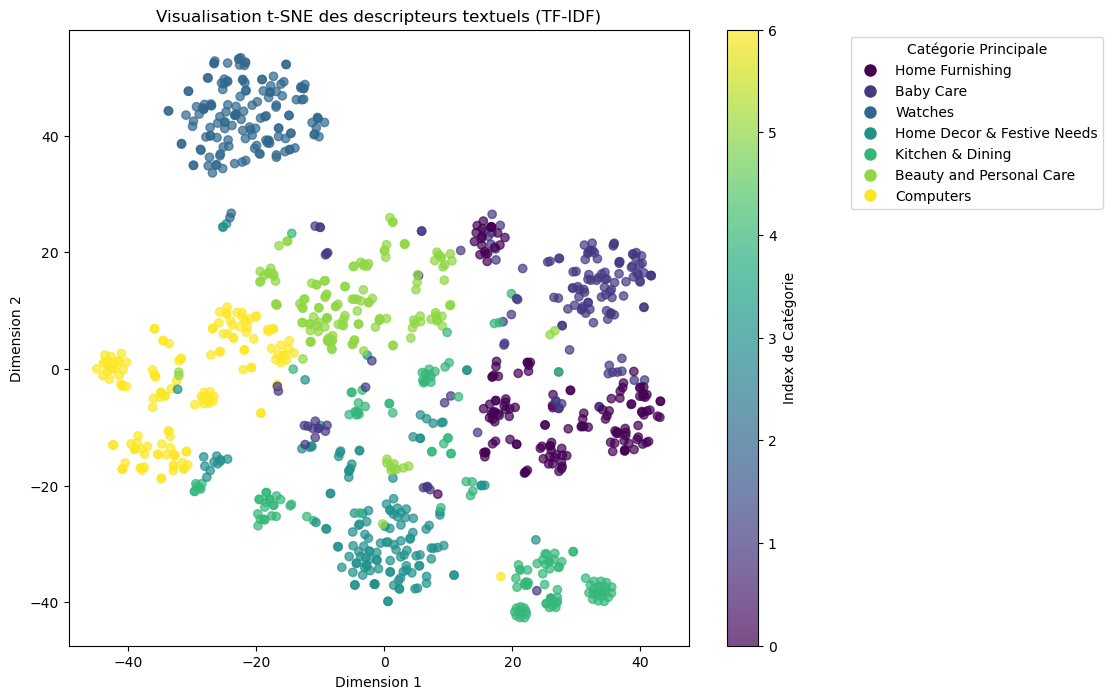

In [45]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

# Supposons que 'data' contient les colonnes 'product_info_clean' et 'product_category_tree'
# Extraire la première catégorie, si elle est présente
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)

# Vérifier que la colonne 'main_category' a été ajoutée correctement
print(data[['product_category_tree', 'main_category']].head())

# Initialiser le vecteur TF-IDF
vectorizer = TfidfVectorizer()

# Transformer la colonne 'product_info_clean' en une matrice TF-IDF
tfidf_matrix = vectorizer.fit_transform(data['product_info_clean'].dropna())

# Appliquer t-SNE pour réduire la dimensionnalité
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# Convertir les résultats t-SNE en DataFrame
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])

# Conserver les index pour aligner avec la catégorie principale
# Récupérer les index des lignes non nulles de 'product_info_clean'
non_null_index = data['product_info_clean'].dropna().index

# Ajouter la colonne 'main_category' à tsne_df en s'assurant que l'index correspond
tsne_df['Catégorie Principale'] = data['main_category'].loc[non_null_index].reset_index(drop=True)

# Vérifier si la colonne 'Catégorie Principale' a été ajoutée avec succès
print(tsne_df.head())

# Visualisation si la colonne 'Catégorie Principale' a été ajoutée avec succès
if 'Catégorie Principale' in tsne_df.columns:
    plt.figure(figsize=(10, 8))
    
    # Créer une palette de couleurs
    unique_categories = tsne_df['Catégorie Principale'].unique()
    category_colors = {category: idx for idx, category in enumerate(unique_categories)}
    
    # Colorer les points en fonction des catégories
    scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                          c=tsne_df['Catégorie Principale'].map(category_colors), 
                          cmap='viridis', alpha=0.7)
    
    # Créer une légende à l'extérieur
    handles = [plt.Line2D([0], [0], marker='o', color='w', 
                           markerfacecolor=scatter.cmap(scatter.norm(category_colors[cat])), 
                           markersize=10) for cat in unique_categories]
    
    plt.legend(handles, unique_categories, title='Catégorie Principale', loc='upper left', bbox_to_anchor=(1.25, 1))
    
    plt.title('Visualisation t-SNE des descripteurs textuels (TF-IDF)')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(scatter, label='Index de Catégorie')
    plt.show()
else:
    print("Impossible d'afficher la visualisation car la colonne 'Catégorie Principale' n'a pas été ajoutée.")


#### Kmeans


Meilleurs hyperparamètres : (7, 'random', 3, 300, 0.0001, 'lloyd') avec un ARI de 0.40


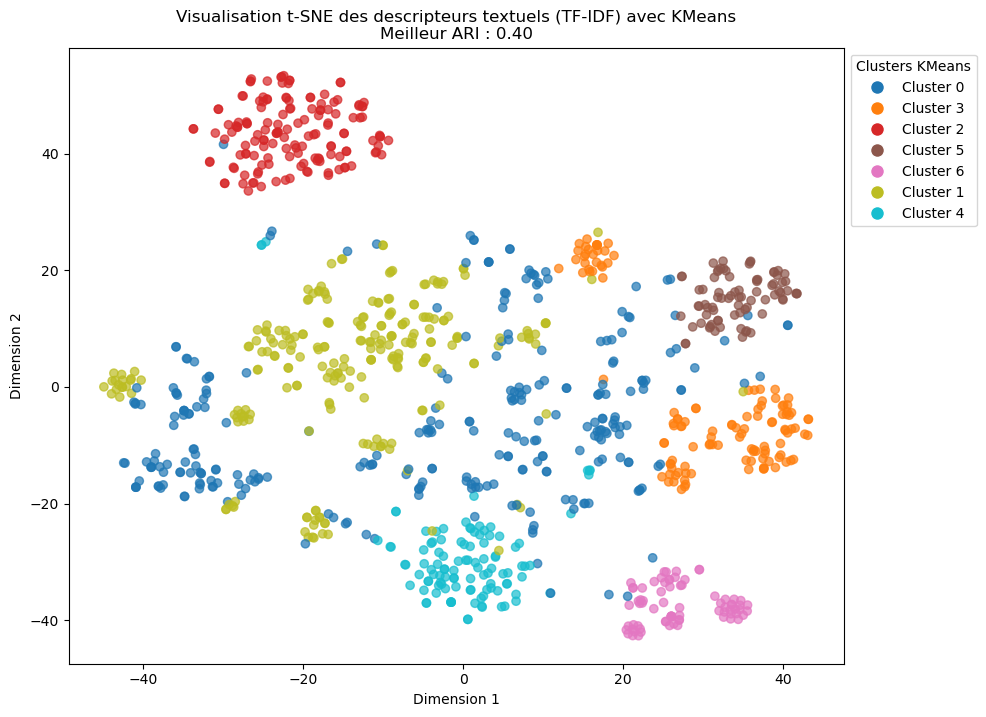

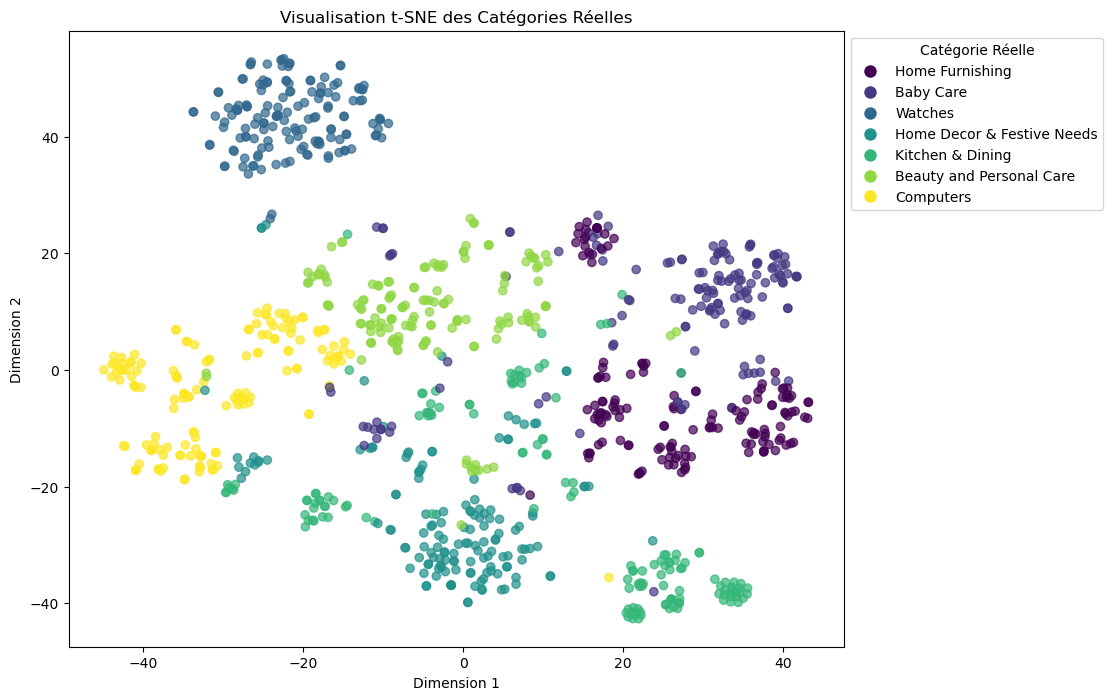

In [46]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import itertools

# Supposons que 'data' contient les colonnes 'product_info_clean' et 'product_category_tree'
# Extraire la première catégorie, si elle est présente
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)

# Initialiser le vecteur TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['product_info_clean'].dropna())

# Préparer les hyperparamètres pour la recherche
param_grid_kmeans = {
    'n_clusters': [7],
    'init': ['k-means++', 'random'],
    'n_init': [3, 2, 4],
    'max_iter': [300, 275],
    'tol': [1e-4, 1e-3,1e-2],
    'algorithm': ['lloyd', 'elkan']
}

# Créer toutes les combinaisons possibles d'hyperparamètres
param_combinations = list(itertools.product(
    param_grid_kmeans['n_clusters'],
    param_grid_kmeans['init'],
    param_grid_kmeans['n_init'],
    param_grid_kmeans['max_iter'],
    param_grid_kmeans['tol'],
    param_grid_kmeans['algorithm']
))

# Variables pour stocker le meilleur ARI et ses hyperparamètres
best_ari_score = -1
best_params = None

# Effectuer la recherche d'hyperparamètres
for params in param_combinations:
    n_clusters, init, n_init, max_iter, tol, algorithm = params
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, 
                    max_iter=max_iter, tol=tol, algorithm=algorithm, random_state=42)
    kmeans_labels = kmeans.fit_predict(tfidf_matrix)
    
    # Calculer l'ARI si les catégories réelles sont disponibles
    non_null_index = data['product_info_clean'].dropna().index
    clustered_df = pd.DataFrame({
        'KMeans Cluster': kmeans_labels,
        'Catégorie Réelle': data['main_category'].loc[non_null_index].reset_index(drop=True)
    })
    
    if clustered_df['Catégorie Réelle'].notnull().all():
        ari_score = adjusted_rand_score(clustered_df['Catégorie Réelle'], clustered_df['KMeans Cluster'])
        if ari_score > best_ari_score:
            best_ari_score = ari_score
            best_params = params

print(f"\nMeilleurs hyperparamètres : {best_params} avec un ARI de {best_ari_score:.2f}")

# Appliquer KMeans avec les meilleurs hyperparamètres
n_clusters, init, n_init, max_iter, tol, algorithm = best_params
kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, 
                max_iter=max_iter, tol=tol, algorithm=algorithm, random_state=42)
best_labels = kmeans.fit_predict(tfidf_matrix)

# Réduction de la dimensionnalité avec t-SNE pour visualiser les résultats
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['KMeans Cluster'] = best_labels
tsne_df['Catégorie Réelle'] = data['main_category'].loc[non_null_index].reset_index(drop=True)

# Visualisation des clusters KMeans
plt.figure(figsize=(10, 8))
unique_clusters = tsne_df['KMeans Cluster'].unique()
cluster_colors = {cluster: idx for idx, cluster in enumerate(unique_clusters)}

scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                      c=tsne_df['KMeans Cluster'].map(cluster_colors), cmap='tab10', alpha=0.7)

# Légende pour les clusters KMeans
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor=scatter.cmap(scatter.norm(cluster_colors[cluster])), 
                      markersize=10) for cluster in unique_clusters]
plt.legend(handles, [f"Cluster {cluster}" for cluster in unique_clusters], 
           title='Clusters KMeans', loc='upper left', bbox_to_anchor=(1, 1))

plt.title(f'Visualisation t-SNE des descripteurs textuels (TF-IDF) avec KMeans\nMeilleur ARI : {best_ari_score:.2f}')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Visualisation des catégories réelles pour comparaison
plt.figure(figsize=(10, 8))
unique_categories = tsne_df['Catégorie Réelle'].unique()
category_colors = {category: idx for idx, category in enumerate(unique_categories)}

scatter_real = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                           c=tsne_df['Catégorie Réelle'].map(category_colors), cmap='viridis', alpha=0.7)

# Légende pour les catégories réelles
handles_real = [plt.Line2D([0], [0], marker='o', color='w', 
                           markerfacecolor=scatter_real.cmap(scatter_real.norm(category_colors[cat])), 
                           markersize=10) for cat in unique_categories]
plt.legend(handles_real, unique_categories, title='Catégorie Réelle', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Visualisation t-SNE des Catégories Réelles')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


## Word2vec

#### FastText


Meilleurs hyperparamètres : (7, 'random', 2, 300, 0.0001, 'lloyd') avec un ARI de 0.19


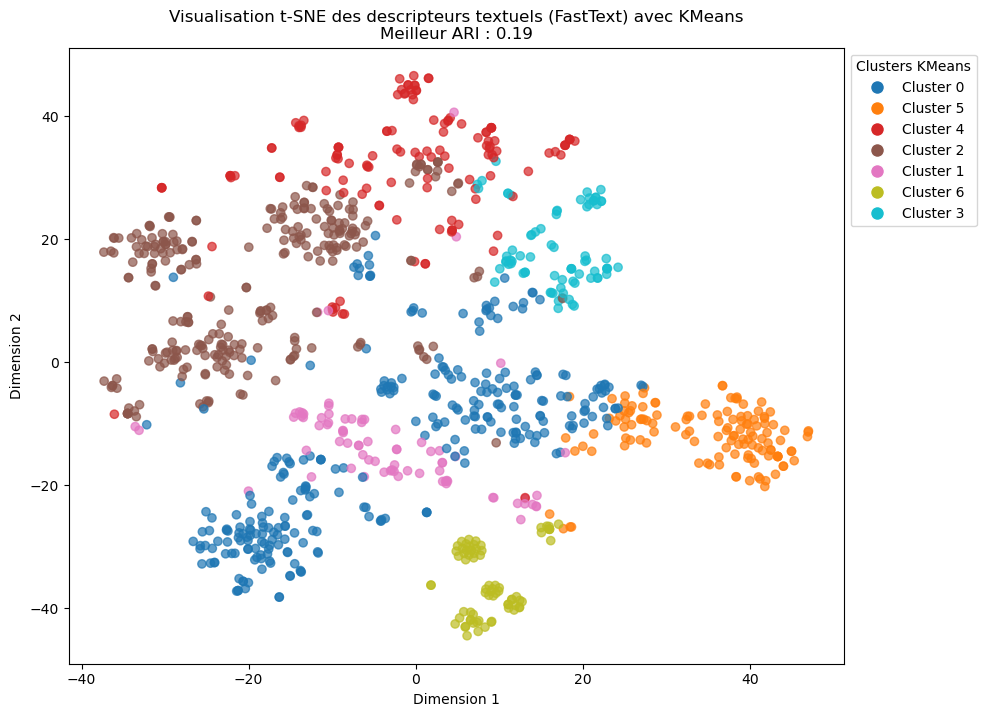

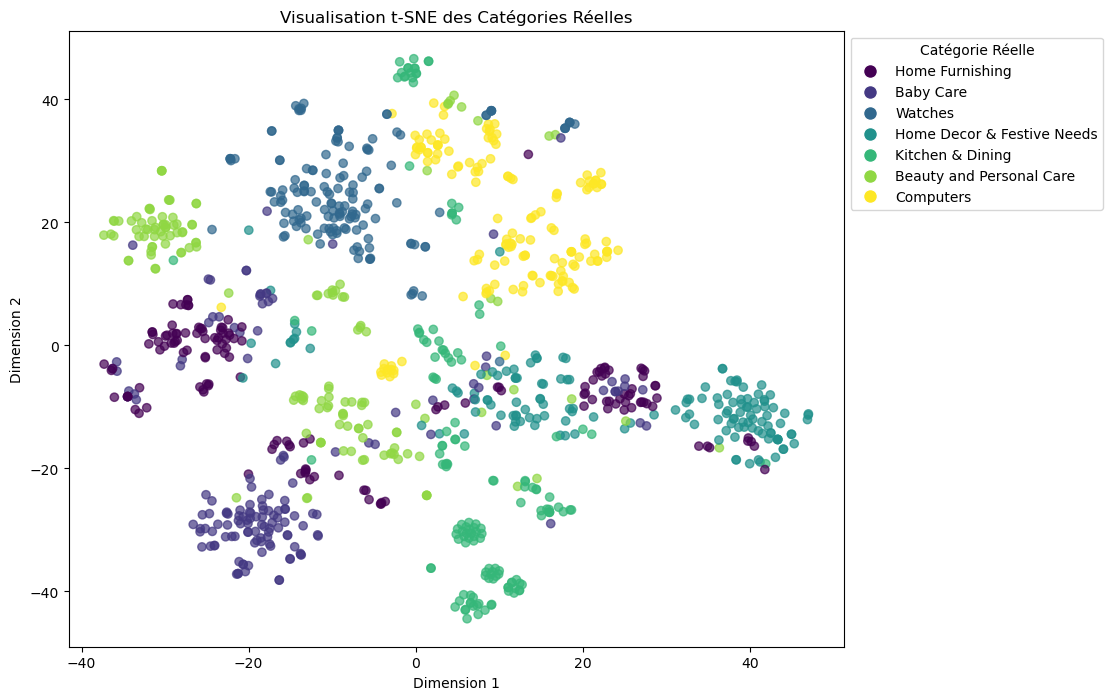

In [47]:
import pandas as pd
import re
import fasttext
import fasttext.util
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import itertools
import numpy as np

# Supposons que 'data' contient les colonnes 'product_info_clean' et 'product_category_tree'
# Extraire la première catégorie, si elle est présente
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)

# Téléchargez un modèle FastText pré-entraîné (par exemple, pour l'anglais)
fasttext.util.download_model('en', if_exists='ignore')  # à faire une seule fois
fasttext_model = fasttext.load_model('cc.en.300.bin')  # Charger le modèle 300 dimensions

# Fonction pour obtenir le vecteur moyen de chaque document
def get_document_vector(doc, model):
    # Diviser le document en mots et calculer la moyenne des vecteurs
    words = doc.split()
    word_vectors = [model.get_word_vector(word) for word in words if word in model.words]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.get_dimension())

# Appliquer le modèle sur les documents pour créer la matrice de documents
data['product_vector'] = data['product_info_clean'].apply(lambda x: get_document_vector(x, fasttext_model))
doc_matrix = np.vstack(data['product_vector'].values)

# Préparer les hyperparamètres pour la recherche
param_grid_kmeans = {
    'n_clusters': [7],
    'init': ['k-means++', 'random'],
    'n_init': [1, 2,3],
    'max_iter': [300, 275,310],
    'tol': [1e-4, 1e-3, 1e-2,1],
    'algorithm': ['lloyd', 'elkan']
}

# Créer toutes les combinaisons possibles d'hyperparamètres
param_combinations = list(itertools.product(
    param_grid_kmeans['n_clusters'],
    param_grid_kmeans['init'],
    param_grid_kmeans['n_init'],
    param_grid_kmeans['max_iter'],
    param_grid_kmeans['tol'],
    param_grid_kmeans['algorithm']
))

# Variables pour stocker le meilleur ARI et ses hyperparamètres
best_ari_score = -1
best_params = None

# Effectuer la recherche d'hyperparamètres
for params in param_combinations:
    n_clusters, init, n_init, max_iter, tol, algorithm = params
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, 
                    max_iter=max_iter, tol=tol, algorithm=algorithm, random_state=42)
    kmeans_labels = kmeans.fit_predict(doc_matrix)
    
    # Calculer l'ARI si les catégories réelles sont disponibles
    if data['main_category'].notnull().all():
        ari_score = adjusted_rand_score(data['main_category'], kmeans_labels)
        if ari_score > best_ari_score:
            best_ari_score = ari_score
            best_params = params

print(f"\nMeilleurs hyperparamètres : {best_params} avec un ARI de {best_ari_score:.2f}")

# Appliquer KMeans avec les meilleurs hyperparamètres
n_clusters, init, n_init, max_iter, tol, algorithm = best_params
kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, 
                max_iter=max_iter, tol=tol, algorithm=algorithm, random_state=42)
best_labels = kmeans.fit_predict(doc_matrix)

# Réduction de la dimensionnalité avec t-SNE pour visualiser les résultats
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(doc_matrix)
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['KMeans Cluster'] = best_labels
tsne_df['Catégorie Réelle'] = data['main_category'].reset_index(drop=True)

# Visualisation des clusters KMeans
plt.figure(figsize=(10, 8))
unique_clusters = tsne_df['KMeans Cluster'].unique()
cluster_colors = {cluster: idx for idx, cluster in enumerate(unique_clusters)}

scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                      c=tsne_df['KMeans Cluster'].map(cluster_colors), cmap='tab10', alpha=0.7)

# Légende pour les clusters KMeans
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor=scatter.cmap(scatter.norm(cluster_colors[cluster])), markersize=10) 
           for cluster in unique_clusters]
plt.legend(handles, [f"Cluster {cluster}" for cluster in unique_clusters], 
           title='Clusters KMeans', loc='upper left', bbox_to_anchor=(1, 1))

plt.title(f'Visualisation t-SNE des descripteurs textuels (FastText) avec KMeans\nMeilleur ARI : {best_ari_score:.2f}')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Visualisation des catégories réelles pour comparaison
plt.figure(figsize=(10, 8))
unique_categories = tsne_df['Catégorie Réelle'].unique()
category_colors = {category: idx for idx, category in enumerate(unique_categories)}

scatter_real = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                           c=tsne_df['Catégorie Réelle'].map(category_colors), cmap='viridis', alpha=0.7)

# Légende pour les catégories réelles
handles_real = [plt.Line2D([0], [0], marker='o', color='w', 
                           markerfacecolor=scatter_real.cmap(scatter_real.norm(category_colors[cat])), 
                           markersize=10) for cat in unique_categories]
plt.legend(handles_real, unique_categories, title='Catégorie Réelle', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Visualisation t-SNE des Catégories Réelles')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


## BERT

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Meilleurs hyperparamètres : (7, 'k-means++', 1, 300, 0.0001, 'lloyd') avec un ARI de 0.28


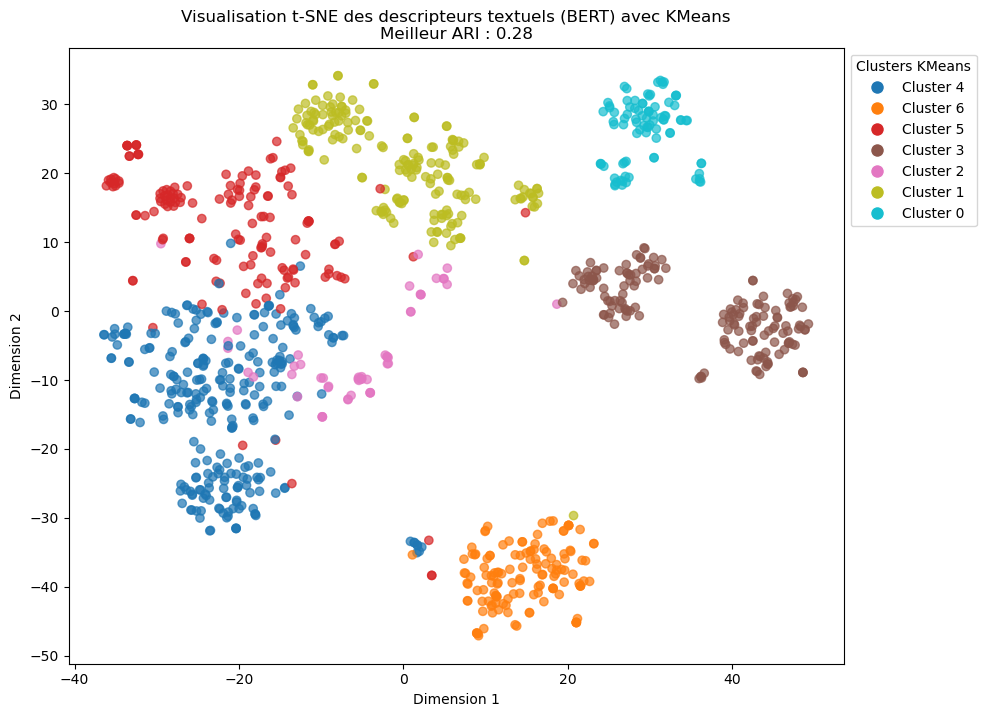

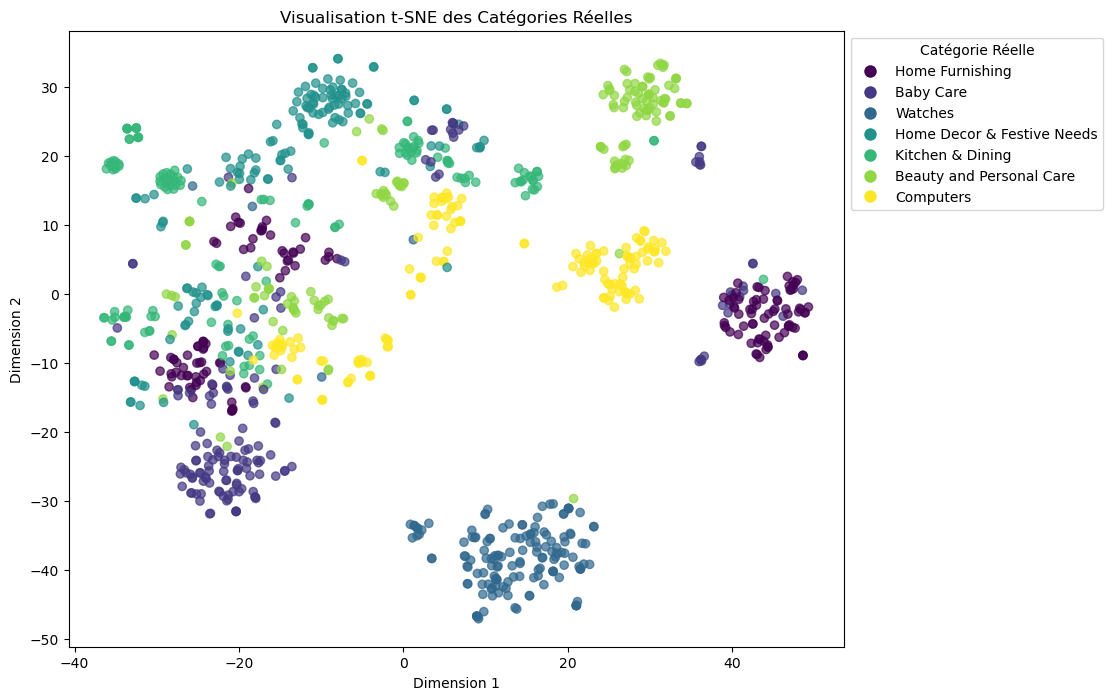

In [48]:
import pandas as pd
import re
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import itertools
import numpy as np
from transformers import RobertaModel, RobertaTokenizer
import torch


# Supposons que 'data' contient les colonnes 'product_info_clean' et 'product_category_tree'
# Extraire la première catégorie, si elle est présente
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)
model_name = "roberta-large"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name, output_hidden_states=True)

def get_bert_embedding(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Récupérer le vecteur [CLS] qui représente l'embedding du texte
    hidden_states = outputs.hidden_states  # Liste des états cachés
    return hidden_states[-1][:, 0, :].squeeze().numpy()  # Dernière couche cachée
# Appliquer le modèle BERT sur les documents pour créer la matrice de documents
data['product_vector'] = data['product_info_clean'].apply(lambda x: get_bert_embedding(x, model, tokenizer))
doc_matrix = np.vstack(data['product_vector'].values)

# Préparer les hyperparamètres pour la recherche
param_grid_kmeans = {
    'n_clusters': [7],
    'init': ['k-means++', 'random'],
    'n_init': [1, 2, 3],
    'max_iter': [300, 275, 310],
    'tol': [1e-4, 1e-3, 1e-5, 1e-6],
    'algorithm': ['lloyd', 'elkan']
}

# Créer toutes les combinaisons possibles d'hyperparamètres
param_combinations = list(itertools.product(
    param_grid_kmeans['n_clusters'],
    param_grid_kmeans['init'],
    param_grid_kmeans['n_init'],
    param_grid_kmeans['max_iter'],
    param_grid_kmeans['tol'],
    param_grid_kmeans['algorithm']
))

# Variables pour stocker le meilleur ARI et ses hyperparamètres
best_ari_score = -1
best_params = None

# Effectuer la recherche d'hyperparamètres
for params in param_combinations:
    n_clusters, init, n_init, max_iter, tol, algorithm = params
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, 
                    max_iter=max_iter, tol=tol, algorithm=algorithm, random_state=42)
    kmeans_labels = kmeans.fit_predict(doc_matrix)
    
    # Calculer l'ARI si les catégories réelles sont disponibles
    if data['main_category'].notnull().all():
        ari_score = adjusted_rand_score(data['main_category'], kmeans_labels)
        if ari_score > best_ari_score:
            best_ari_score = ari_score
            best_params = params

print(f"\nMeilleurs hyperparamètres : {best_params} avec un ARI de {best_ari_score:.2f}")

# Appliquer KMeans avec les meilleurs hyperparamètres
n_clusters, init, n_init, max_iter, tol, algorithm = best_params
kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, 
                max_iter=max_iter, tol=tol, algorithm=algorithm, random_state=42)
best_labels = kmeans.fit_predict(doc_matrix)

# Réduction de la dimensionnalité avec t-SNE pour visualiser les résultats
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(doc_matrix)
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['KMeans Cluster'] = best_labels
tsne_df['Catégorie Réelle'] = data['main_category'].reset_index(drop=True)

# Visualisation des clusters KMeans
plt.figure(figsize=(10, 8))
unique_clusters = tsne_df['KMeans Cluster'].unique()
cluster_colors = {cluster: idx for idx, cluster in enumerate(unique_clusters)}

scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                      c=tsne_df['KMeans Cluster'].map(cluster_colors), cmap='tab10', alpha=0.7)

# Légende pour les clusters KMeans
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor=scatter.cmap(scatter.norm(cluster_colors[cluster])), markersize=10) 
           for cluster in unique_clusters]
plt.legend(handles, [f"Cluster {cluster}" for cluster in unique_clusters], 
           title='Clusters KMeans', loc='upper left', bbox_to_anchor=(1, 1))

plt.title(f'Visualisation t-SNE des descripteurs textuels (BERT) avec KMeans\nMeilleur ARI : {best_ari_score:.2f}')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Visualisation des catégories réelles pour comparaison
plt.figure(figsize=(10, 8))
unique_categories = tsne_df['Catégorie Réelle'].unique()
category_colors = {category: idx for idx, category in enumerate(unique_categories)}

scatter_real = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                           c=tsne_df['Catégorie Réelle'].map(category_colors), cmap='viridis', alpha=0.7)

# Légende pour les catégories réelles
handles_real = [plt.Line2D([0], [0], marker='o', color='w', 
                           markerfacecolor=scatter_real.cmap(scatter_real.norm(category_colors[cat])), 
                           markersize=10) for cat in unique_categories]
plt.legend(handles_real, unique_categories, title='Catégorie Réelle', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Visualisation t-SNE des Catégories Réelles')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


## USE


Meilleurs hyperparamètres : (7, 'k-means++', 4, 300, 0.0001, 'lloyd') avec un ARI de 0.36


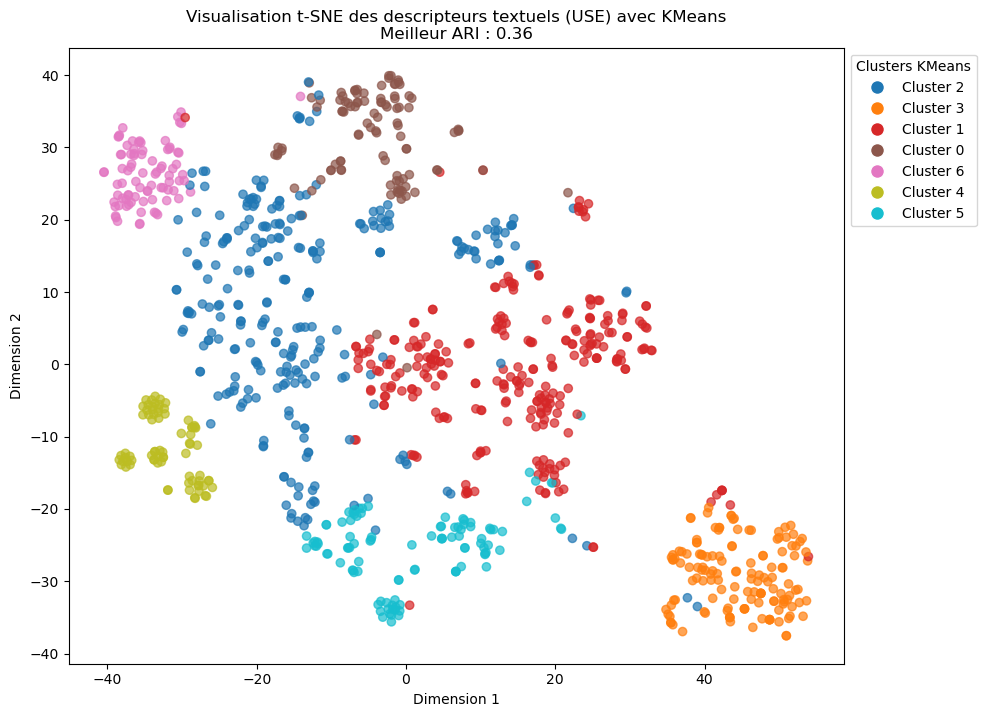

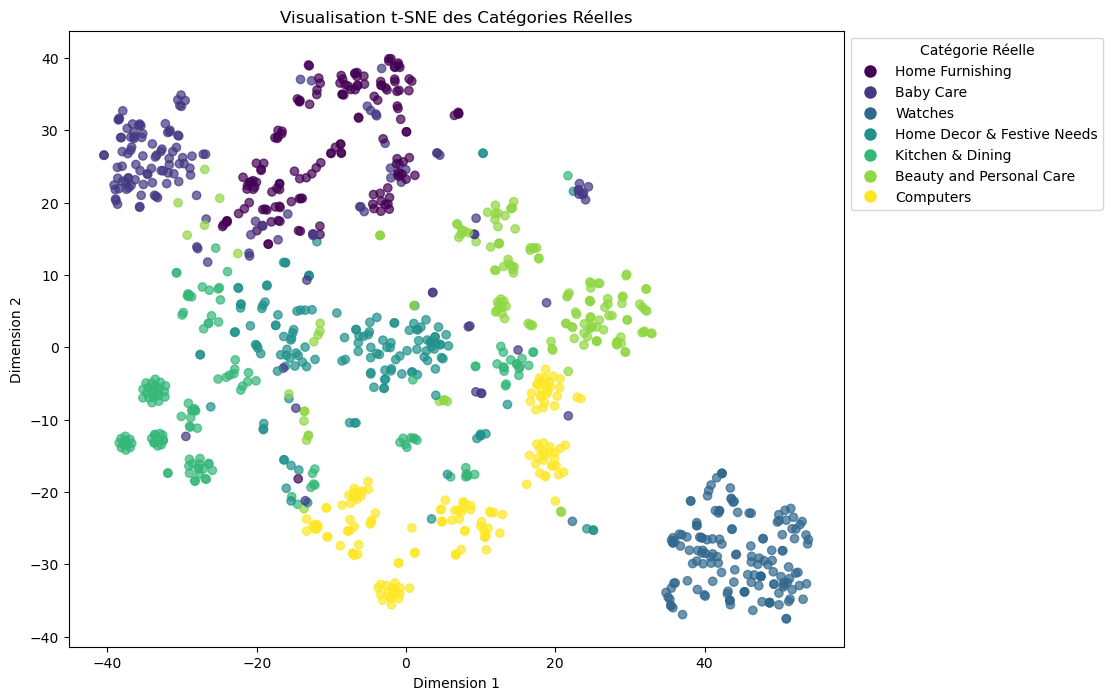

In [49]:
import pandas as pd
import re
import tensorflow_hub as hub
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import itertools
import numpy as np

# Supposons que 'data' contient les colonnes 'product_info_clean' et 'product_category_tree'
# Extraire la première catégorie, si elle est présente
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)

# Charger le modèle Universal Sentence Encoder depuis TensorFlow Hub
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embed = hub.load(model_url)

# Fonction pour obtenir l'embedding USE pour chaque document
def get_use_embedding(doc):
    # Passer le texte au modèle USE et obtenir le vecteur d'embedding
    embedding = embed([doc])
    return np.array(embedding).squeeze()

# Appliquer le modèle USE sur les documents pour créer la matrice de documents
data['product_vector'] = data['product_info_clean'].apply(get_use_embedding)
doc_matrix = np.vstack(data['product_vector'].values)

# Préparer les hyperparamètres pour la recherche
param_grid_kmeans = {
    'n_clusters': [7],
    'init': ['k-means++', 'random'],
    'n_init': [4, 2, 3],
    'max_iter': [300, 275, 310],
    'tol': [1e-4, 1e-3, 1e-2, 1e-5],
    'algorithm': ['lloyd', 'elkan']
}

# Créer toutes les combinaisons possibles d'hyperparamètres
param_combinations = list(itertools.product(
    param_grid_kmeans['n_clusters'],
    param_grid_kmeans['init'],
    param_grid_kmeans['n_init'],
    param_grid_kmeans['max_iter'],
    param_grid_kmeans['tol'],
    param_grid_kmeans['algorithm']
))

# Variables pour stocker le meilleur ARI et ses hyperparamètres
best_ari_score = -1
best_params = None

# Effectuer la recherche d'hyperparamètres
for params in param_combinations:
    n_clusters, init, n_init, max_iter, tol, algorithm = params
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, 
                    max_iter=max_iter, tol=tol, algorithm=algorithm, random_state=42)
    kmeans_labels = kmeans.fit_predict(doc_matrix)
    
    # Calculer l'ARI si les catégories réelles sont disponibles
    if data['main_category'].notnull().all():
        ari_score = adjusted_rand_score(data['main_category'], kmeans_labels)
        if ari_score > best_ari_score:
            best_ari_score = ari_score
            best_params = params

print(f"\nMeilleurs hyperparamètres : {best_params} avec un ARI de {best_ari_score:.2f}")

# Appliquer KMeans avec les meilleurs hyperparamètres
n_clusters, init, n_init, max_iter, tol, algorithm = best_params
kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, 
                max_iter=max_iter, tol=tol, algorithm=algorithm, random_state=42)
best_labels = kmeans.fit_predict(doc_matrix)

# Réduction de la dimensionnalité avec t-SNE pour visualiser les résultats
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(doc_matrix)
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['KMeans Cluster'] = best_labels
tsne_df['Catégorie Réelle'] = data['main_category'].reset_index(drop=True)

# Visualisation des clusters KMeans
plt.figure(figsize=(10, 8))
unique_clusters = tsne_df['KMeans Cluster'].unique()
cluster_colors = {cluster: idx for idx, cluster in enumerate(unique_clusters)}

scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                      c=tsne_df['KMeans Cluster'].map(cluster_colors), cmap='tab10', alpha=0.7)

# Légende pour les clusters KMeans
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor=scatter.cmap(scatter.norm(cluster_colors[cluster])), markersize=10) 
           for cluster in unique_clusters]
plt.legend(handles, [f"Cluster {cluster}" for cluster in unique_clusters], 
           title='Clusters KMeans', loc='upper left', bbox_to_anchor=(1, 1))

plt.title(f'Visualisation t-SNE des descripteurs textuels (USE) avec KMeans\nMeilleur ARI : {best_ari_score:.2f}')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Visualisation des catégories réelles pour comparaison
plt.figure(figsize=(10, 8))
unique_categories = tsne_df['Catégorie Réelle'].unique()
category_colors = {category: idx for idx, category in enumerate(unique_categories)}

scatter_real = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                           c=tsne_df['Catégorie Réelle'].map(category_colors), cmap='viridis', alpha=0.7)

# Légende pour les catégories réelles
handles_real = [plt.Line2D([0], [0], marker='o', color='w', 
                           markerfacecolor=scatter_real.cmap(scatter_real.norm(category_colors[cat])), 
                           markersize=10) for cat in unique_categories]
plt.legend(handles_real, unique_categories, title='Catégorie Réelle', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Visualisation t-SNE des Catégories Réelles')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


## Random Forest avec TF IDF

Meilleurs hyperparamètres : {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Meilleure précision d'entraînement obtenue : 0.86
Rapport de classification avec la colonne accuracy :
                             precision    recall  f1-score     support  \
Baby Care                    0.777778  0.777778  0.777778   45.000000   
Beauty and Personal Care     0.750000  0.833333  0.789474   36.000000   
Computers                    0.976744  0.807692  0.884211   52.000000   
Home Decor & Festive Needs   0.792453  0.954545  0.865979   44.000000   
Home Furnishing              0.870370  0.903846  0.886792   52.000000   
Kitchen & Dining             0.968750  0.815789  0.885714   38.000000   
Watches                      1.000000  1.000000  1.000000   48.000000   
accuracy                     0.873016  0.873016  0.873016    0.873016   
macro avg                    0.876585  0.870426  0.869993  315.000000   
weighted avg                 0.881684  0.873016  0.8

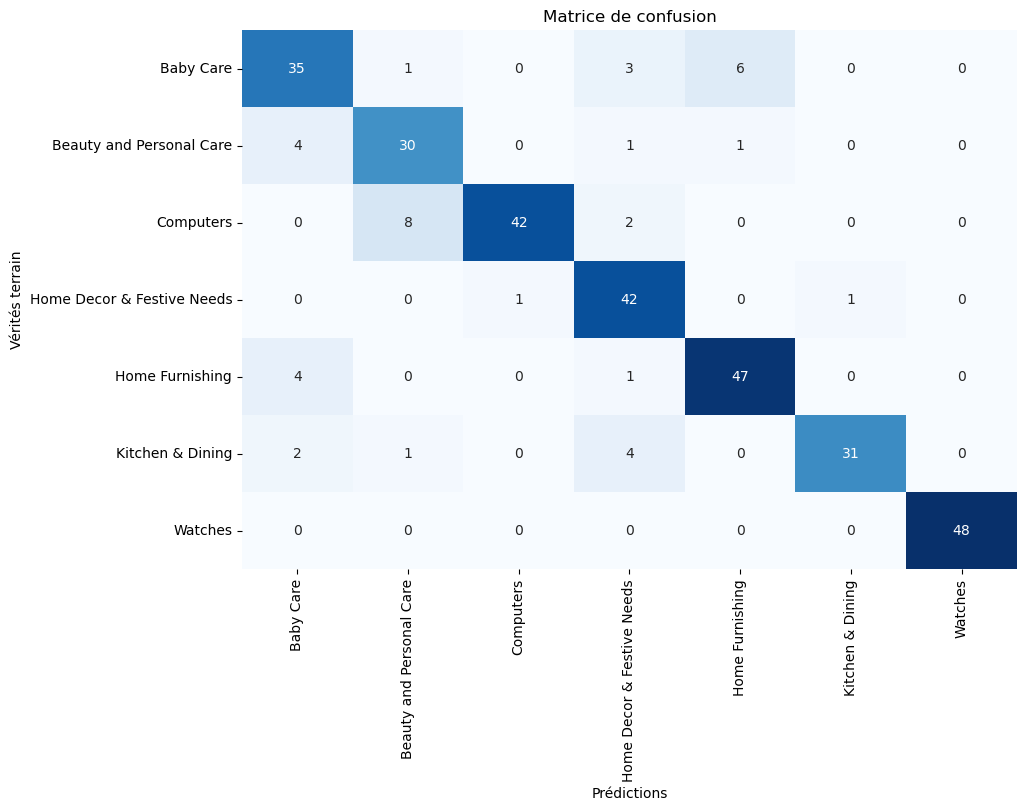

In [51]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que 'data' contienne les colonnes 'product_info_clean' et 'product_category_tree'
# Extraire la première catégorie pour en faire la variable cible
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)

# Initialiser le vecteur TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['product_info_clean'].dropna())

# Définir X et y (caractéristiques et cible)
X = tfidf_matrix.toarray()  # Convertir la matrice en array pour compatibilité avec scikit-learn
y = data['main_category'].loc[data['product_info_clean'].dropna().index].values

# Séparation en ensemble d'entraînement et de test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition de la grille des hyperparamètres pour GridSearchCV
param_grid_rf = {
    'n_estimators': [200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4,10]
}

# Création du modèle Random Forest
rf = RandomForestClassifier(random_state=42)

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                           cv=5, n_jobs=-1, verbose=0, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres trouvés
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")
print(f"Meilleure précision d'entraînement obtenue : {grid_search.best_score_:.2f}")

# Utiliser le meilleur modèle pour prédire sur l'ensemble de test
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Calcul des performances sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)

# Générer le rapport de classification sous forme de dictionnaire
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convertir le rapport en DataFrame pour ajout de la colonne 'accuracy'
report_df = pd.DataFrame(report_dict).transpose()

# Ajouter la colonne 'accuracy' avec la même valeur d'accuracy pour chaque catégorie
report_df['accuracy'] = accuracy

# Affichage du rapport de classification avec la colonne 'accuracy'
print("Rapport de classification avec la colonne accuracy :\n", report_df)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer un DataFrame pour une meilleure visualisation de la matrice de confusion
cm_df = pd.DataFrame(cm, index=best_rf.classes_, columns=best_rf.classes_)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 10}, 
            xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérités terrain')
plt.show()


## Sentence Transformer


Meilleurs hyperparamètres : (7, 'random', 2, 300, 0.0001, 'lloyd') avec un ARI de 0.39


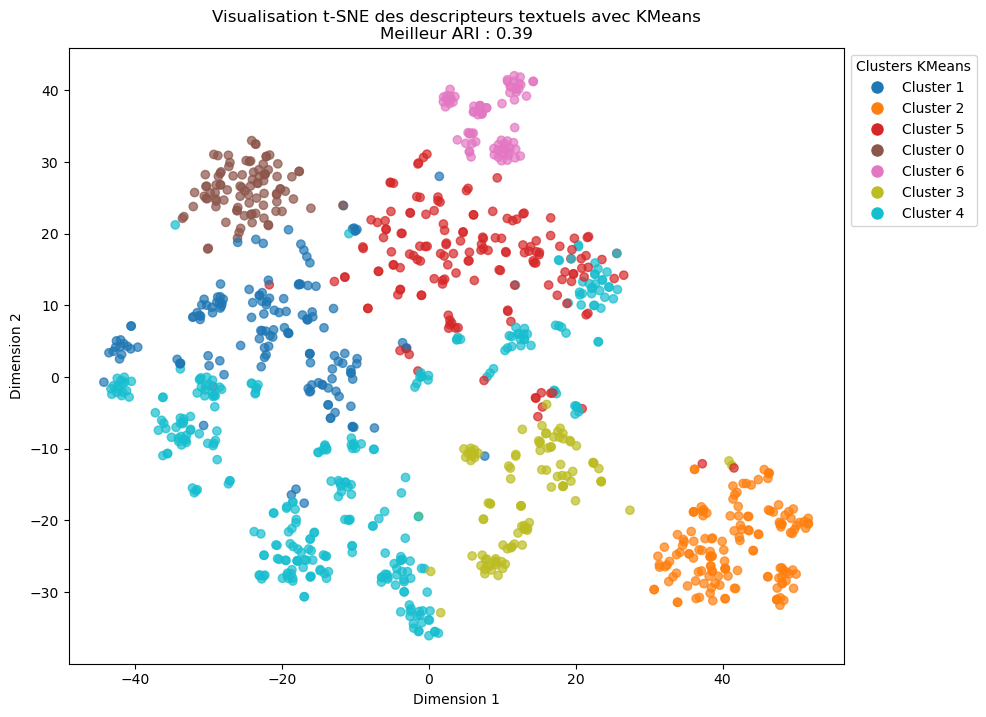

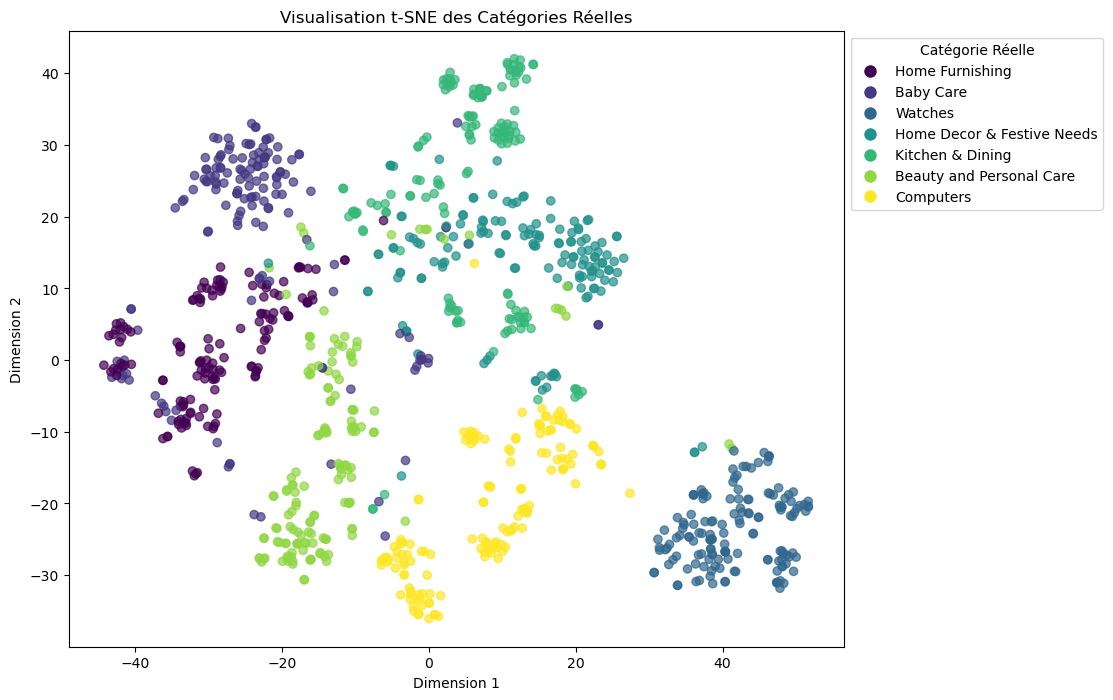

In [53]:
import pandas as pd
import numpy as np
import re
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import itertools

# Supposons que 'data' contient les colonnes 'product_info_clean' et 'product_category_tree'
# Extraire la première catégorie, si elle est présente
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)

# Charger le modèle SentenceTransformer pour obtenir des embeddings de phrases
model_name = "all-MiniLM-L6-v2"  # Utilisation d'un modèle léger et rapide
model = SentenceTransformer(model_name)

# Calculer les embeddings pour chaque texte dans 'product_info_clean'
data['product_vector'] = data['product_info_clean'].apply(lambda x: model.encode(x, convert_to_tensor=False))

# Transformer la liste d'embeddings en une matrice de documents
doc_matrix = np.vstack(data['product_vector'].values)

# Préparer les hyperparamètres pour la recherche KMeans
param_grid_kmeans = {
    'n_clusters': [7],
    'init': ['k-means++', 'random'],
    'n_init': [1, 2, 3],
    'max_iter': [300, 275, 310],
    'tol': [1e-4, 1e-3, 1e-5, 1e-6],
    'algorithm': ['lloyd', 'elkan']
}

# Créer toutes les combinaisons possibles d'hyperparamètres
param_combinations = list(itertools.product(
    param_grid_kmeans['n_clusters'],
    param_grid_kmeans['init'],
    param_grid_kmeans['n_init'],
    param_grid_kmeans['max_iter'],
    param_grid_kmeans['tol'],
    param_grid_kmeans['algorithm']
))

# Variables pour stocker le meilleur ARI et ses hyperparamètres
best_ari_score = -1
best_params = None

# Effectuer la recherche d'hyperparamètres
for params in param_combinations:
    n_clusters, init, n_init, max_iter, tol, algorithm = params
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, 
                    max_iter=max_iter, tol=tol, algorithm=algorithm, random_state=42)
    kmeans_labels = kmeans.fit_predict(doc_matrix)
    
    # Calculer l'ARI si les catégories réelles sont disponibles
    if data['main_category'].notnull().all():
        ari_score = adjusted_rand_score(data['main_category'], kmeans_labels)
        if ari_score > best_ari_score:
            best_ari_score = ari_score
            best_params = params

print(f"\nMeilleurs hyperparamètres : {best_params} avec un ARI de {best_ari_score:.2f}")

# Appliquer KMeans avec les meilleurs hyperparamètres
n_clusters, init, n_init, max_iter, tol, algorithm = best_params
kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, 
                max_iter=max_iter, tol=tol, algorithm=algorithm, random_state=42)
best_labels = kmeans.fit_predict(doc_matrix)

# Réduction de la dimensionnalité avec t-SNE pour visualiser les résultats
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(doc_matrix)
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['KMeans Cluster'] = best_labels
tsne_df['Catégorie Réelle'] = data['main_category'].reset_index(drop=True)

# Visualisation des clusters KMeans
plt.figure(figsize=(10, 8))
unique_clusters = tsne_df['KMeans Cluster'].unique()
cluster_colors = {cluster: idx for idx, cluster in enumerate(unique_clusters)}

scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                      c=tsne_df['KMeans Cluster'].map(cluster_colors), cmap='tab10', alpha=0.7)

# Légende pour les clusters KMeans
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor=scatter.cmap(scatter.norm(cluster_colors[cluster])), markersize=10) 
           for cluster in unique_clusters]
plt.legend(handles, [f"Cluster {cluster}" for cluster in unique_clusters], 
           title='Clusters KMeans', loc='upper left', bbox_to_anchor=(1, 1))

plt.title(f'Visualisation t-SNE des descripteurs textuels avec KMeans\nMeilleur ARI : {best_ari_score:.2f}')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Visualisation des catégories réelles pour comparaison
plt.figure(figsize=(10, 8))
unique_categories = tsne_df['Catégorie Réelle'].unique()
category_colors = {category: idx for idx, category in enumerate(unique_categories)}

scatter_real = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                           c=tsne_df['Catégorie Réelle'].map(category_colors), cmap='viridis', alpha=0.7)

# Légende pour les catégories réelles
handles_real = [plt.Line2D([0], [0], marker='o', color='w', 
                           markerfacecolor=scatter_real.cmap(scatter_real.norm(category_colors[cat])), 
                           markersize=10) for cat in unique_categories]
plt.legend(handles_real, unique_categories, title='Catégorie Réelle', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Visualisation t-SNE des Catégories Réelles')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


# Récapitulatif

In [54]:
from tabulate import tabulate

# Données à afficher dans le tableau
data = [
    ["Bag of Words", "(7, 'random', 3, 300, 0.0001, 'lloyd')", 0.16],
    ["TF IDF", "(7, 'random', 3, 300, 0.0001, 'lloyd')", 0.40],
    ["FastText", "(7, 'random', 2, 300, 0.0001, 'lloyd')", 0.19],
    ["BERT", "(7, 'k-means++', 1, 300, 0.0001, 'lloyd')", 0.28],
    ["USE", "(7, 'k-means++', 4, 300, 0.0001, 'lloyd')", 0.36],
    ["Sentence Transformer", "(7, 'random', 2, 300, 0.0001, 'lloyd')", 0.39],
]

# Trouver le meilleur score ARI
best_ari = max(row[2] for row in data)

# Mettre en valeur toute la ligne du meilleur score ARI
highlighted_data = []
for row in data:
    if row[2] == best_ari:
        highlighted_data.append([f"\033[92m{cell}\033[0m" for cell in row])  # Met toute la ligne en vert
    else:
        highlighted_data.append(row)

# Entêtes des colonnes
headers = ["Méthode", "Meilleurs Hyperparamètres", "ARI"]

# Affichage du tableau formaté
print(tabulate(highlighted_data, headers=headers, tablefmt="pipe"))


| Méthode              | Meilleurs Hyperparamètres                 |   ARI |
|:---------------------|:------------------------------------------|------:|
| Bag of Words         | (7, 'random', 3, 300, 0.0001, 'lloyd')    |  0.16 |
| TF IDF               | (7, 'random', 3, 300, 0.0001, 'lloyd')    |  0.4  |
| FastText             | (7, 'random', 2, 300, 0.0001, 'lloyd')    |  0.19 |
| BERT                 | (7, 'k-means++', 1, 300, 0.0001, 'lloyd') |  0.28 |
| USE                  | (7, 'k-means++', 4, 300, 0.0001, 'lloyd') |  0.36 |
| Sentence Transformer | (7, 'random', 2, 300, 0.0001, 'lloyd')    |  0.39 |
